In [66]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de nulos

Una vez hecha la primera limpieza y transformación de datos que se guardó en el csv *`hr_limpio_con_nulos.csv`* procedemos a gestionar todos los datos nulos.

In [67]:
df_ejemplo = pd.read_csv('hr_limpio_con_nulos.csv', index_col=0)

In [68]:
df_ejemplo.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,yearbirth,remotework
0,51,No,NaN,684.0,NaN,6.0,University,NaN,162.0,1,male,51,3,Expert,resEArch DIREcToR,3,NaN,19537.0,6462,7,No,13,3.0,3,0,NaN,5,3.0,20,15,15,1972,Yes
1,52,No,NaN,699.0,NaN,1.0,Master Degree,Life Sciences,259.0,3,male,65,2,Expert,ManAGeR,3,NaN,19999.0,5678,0,NaN,14,3.0,1,1,34.0,5,3.0,33,11,9,1971,Yes


In [69]:
# Lo primero que vamos a hacer es calcular el porcentaje de nulos que tenemos para cada columna
(df_ejemplo.isnull().sum() / df_ejemplo.shape[0]) * 100

age                          0.000000
attrition                    0.000000
businesstravel              47.880795
dailyrate                    7.682119
department                  81.258278
distancefromhome            11.788079
education                    0.000000
educationfield              46.490066
employeenumber              28.543046
environmentsatisfaction      0.000000
gender                       0.000000
hourlyrate                   0.000000
jobinvolvement               0.000000
joblevel                     0.000000
jobrole                      0.000000
jobsatisfaction              0.000000
maritalstatus               40.264901
monthlyincome               52.913907
monthlyrate                  0.000000
numcompaniesworked           0.000000
overtime                    41.721854
percentsalaryhike            0.000000
performancerating           12.052980
relationshipsatisfaction     0.000000
stockoptionlevel             0.000000
totalworkingyears           32.715232
trainingtime

In [70]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame((df_ejemplo.isnull().sum() / df_ejemplo.shape[0]) * 100, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
businesstravel,47.880795
dailyrate,7.682119
department,81.258278
distancefromhome,11.788079
educationfield,46.490066
employeenumber,28.543046
maritalstatus,40.264901
monthlyincome,52.913907
overtime,41.721854
performancerating,12.052980


# Variables categóricas

In [71]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df_ejemplo[df_ejemplo.columns[df_ejemplo.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['businesstravel', 'department', 'educationfield', 'maritalstatus',
       'overtime'],
      dtype='object')


In [72]:
# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_ejemplo[col].value_counts() / df_ejemplo.shape[0])
    print("..........")

La distribución de las categorías para la columna BUSINESSTRAVEL


businesstravel
travel_rarely        0.364901
travel_frequently    0.101325
non-travel           0.054967
Name: count, dtype: float64

..........
La distribución de las categorías para la columna DEPARTMENT


department
 Research & Development     0.122517
 Sales                      0.055629
 Human Resources            0.009272
Name: count, dtype: float64

..........
La distribución de las categorías para la columna EDUCATIONFIELD


educationfield
Life Sciences       0.215894
Medical             0.169536
Marketing           0.064238
Technical Degree    0.042384
Other               0.035762
Human Resources     0.007285
Name: count, dtype: float64

..........
La distribución de las categorías para la columna MARITALSTATUS


maritalstatus
Married     0.270861
Single      0.202649
Divorced    0.123841
Name: count, dtype: float64

..........
La distribución de las categorías para la columna OVERTIME


overtime
No     0.422517
Yes    0.160265
Name: count, dtype: float64

..........


**Criterio para gestionar los nulos de las variables categóricas:**

- Según los porcentajes de las categorías, si hay una categoría dominante reemplazamos por la moda, de lo contrario indicamos que pertenece a la categoría 'unknown'(desconocido)

Así lo hemos hecho para las siguientes columnas:

- **businesstravel:** categoría 'Desconocido' porque tiene casi un 50% de nulos

- **department:** categoría 'Desconocido' porque tiene 81% de nulos. Asignarle la moda no tendría sentido porque tiene muchos nulos.

- **educationfield** :categoría 'Desconocido' porque tiene casi 47% de nulos.

- **maritalstatus** categoría 'Desconocido' porque tiene un 40% de nulos. Además no tiene mucha diferencia con la otra categoría. 

- **overtime:** categoría 'Desconocido' porque tiene un 40% de nulos. Creemos que es un dato relevante como para asignarle el 'No'

In [73]:
# lo primero que vamos a hacer es crear dos listas, una con los nombres de las columnas que reemplazaremos por la moda y otra para las columnas que reemplazaremos por una categoría nueva
#columnas_moda = []
columnas_desconocidas = ['businesstravel', 'department', 'educationfield', 'maritalstatus', 'overtime']

Reemplazamos por la moda

Agregamos una nueva categoria

In [74]:
# iteramos por la lista de columnas a las que le vamos a cambiar los nulos por "Uknown"
for columna in columnas_desconocidas:
    
    # reemplazamos los nulos por el valor Unknown para cada una de las columnas de la lista
    df_ejemplo[columna] = df_ejemplo[columna].fillna("Unknown")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_ejemplo[columnas_desconocidas].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


businesstravel    0
department        0
educationfield    0
maritalstatus     0
overtime          0
dtype: int64

In [75]:
df_ejemplo.head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,yearbirth,remotework
0,51,No,Unknown,684.0,Unknown,6.0,University,Unknown,162.0,1,male,51,3,Expert,resEArch DIREcToR,3,Unknown,19537.0,6462,7,No,13,3.0,3,0,NaN,5,3.0,20,15,15,1972,Yes
1,52,No,Unknown,699.0,Unknown,1.0,Master Degree,Life Sciences,259.0,3,male,65,2,Expert,ManAGeR,3,Unknown,19999.0,5678,0,Unknown,14,3.0,1,1,34.0,5,3.0,33,11,9,1971,Yes
2,42,No,travel_rarely,532.0,Research & Development,4.0,College,Technical Degree,319.0,3,male,58,3,Expert,ManaGER,4,Married,19232.0,4933,1,No,11,3.0,4,0,22.0,3,NaN,22,11,15,1981,Yes
3,47,No,travel_rarely,359.0,Unknown,2.0,Master Degree,Medical,NaN,1,female,82,3,Advanced,ReseArCH DIrECtOr,3,Married,17169.0,26703,3,Unknown,19,3.0,2,2,NaN,2,NaN,20,5,6,1976,No
4,46,No,Unknown,1319.0,Unknown,3.0,University,Technical Degree,NaN,1,female,45,4,Advanced,sAleS EXECUtIve,1,Divorced,NaN,7739,2,No,12,3.0,4,1,NaN,5,3.0,19,2,8,1977,No


______

## Variables numéricas

In [76]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df_ejemplo[df_ejemplo.columns[df_ejemplo.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['dailyrate', 'distancefromhome', 'employeenumber', 'monthlyincome',
       'performancerating', 'totalworkingyears', 'worklifebalance'],
      dtype='object')


In [77]:
# lo primero que vamos a hacer es calcular el número de nulos que tenemos en cada una de las columnas numericas
df_ejemplo[nulos_esta_num].isnull().sum() / df_ejemplo.shape[0]

dailyrate            0.076821
distancefromhome     0.117881
employeenumber       0.285430
monthlyincome        0.529139
performancerating    0.120530
totalworkingyears    0.327152
worklifebalance      0.066225
dtype: float64

**Podemos ver los valores atípicos con diagrama de boxplot:**

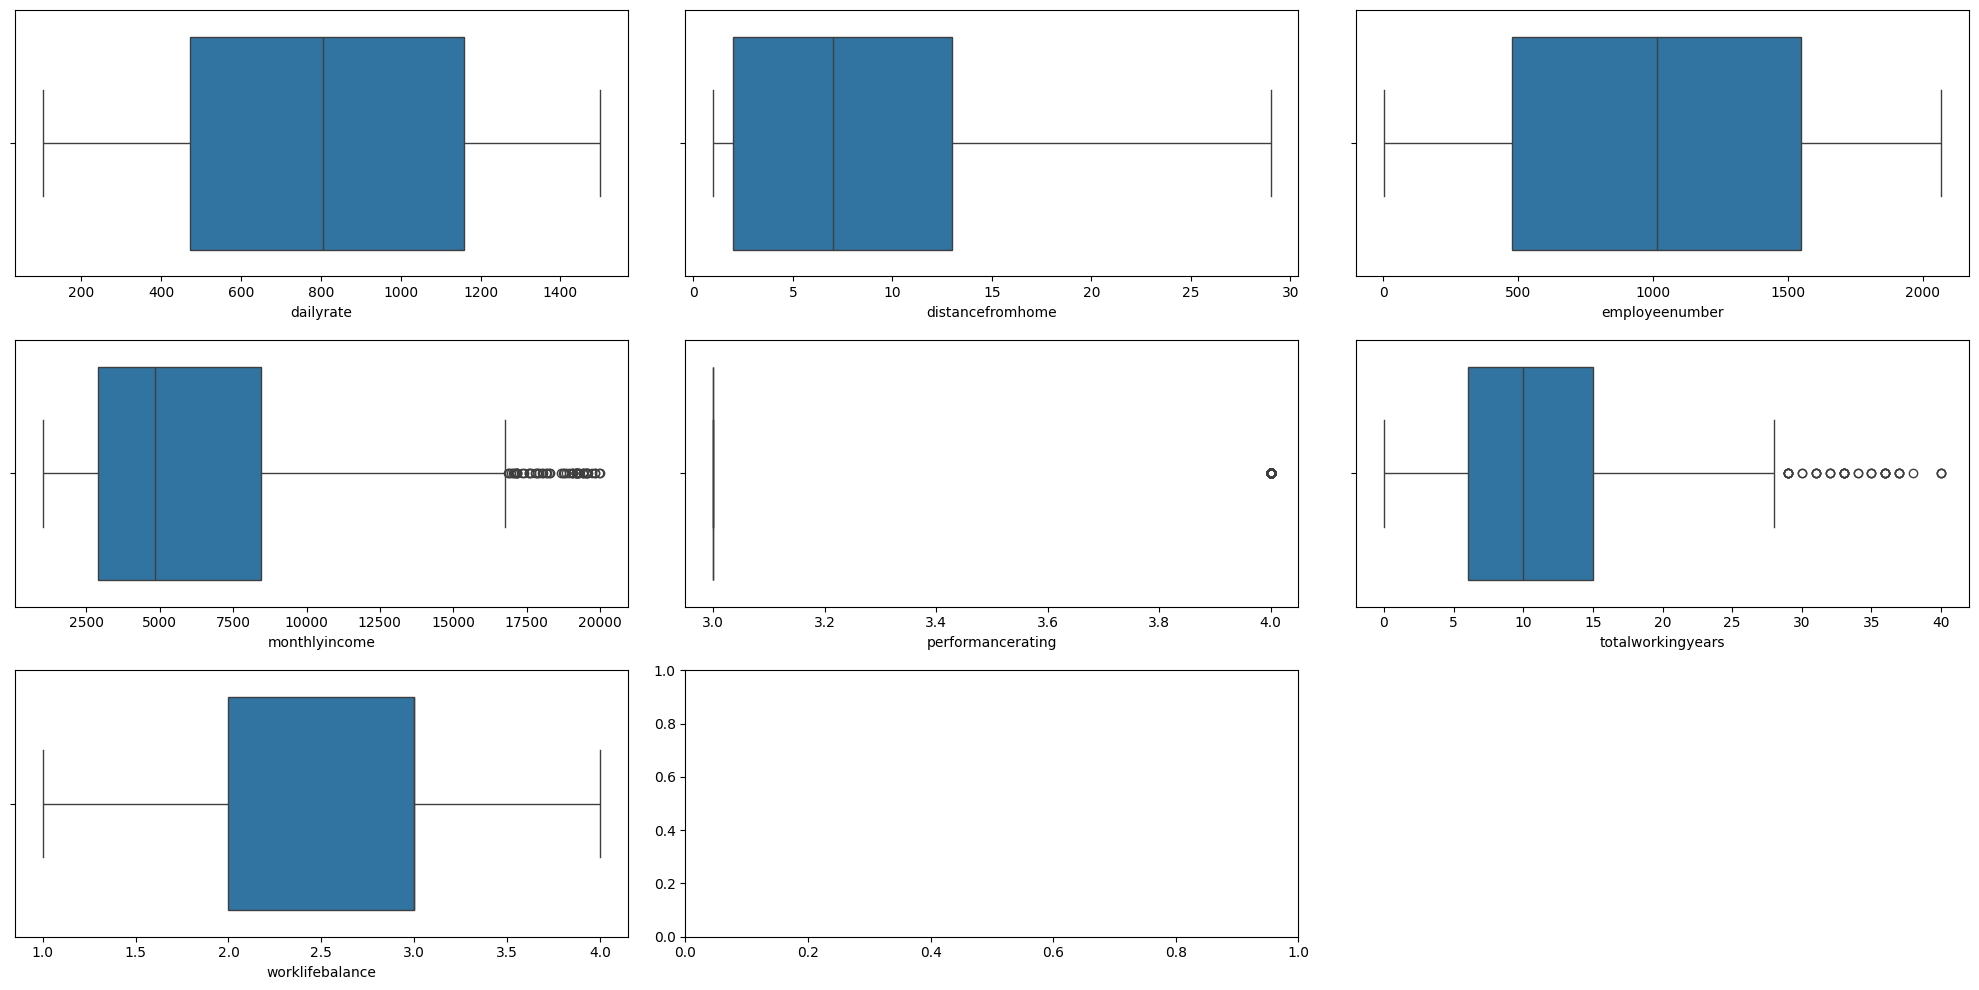

In [78]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df_ejemplo, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

______
**Criterio para gestionar los nulos de las variables numéricas:**


Aquellas columnas que tienen valores por debajo del 5-10% podemos optar por reemplazar por la media o mediana
 - Si la muestra tiene valores atípicos, la mediana es la opción, de lo contrario podemos usar la media

In [79]:
# para decidir si usamos la media o la mediana lo que haremos es hacer un describe de la columna para saber cuales son estos valores
df_ejemplo["worklifebalance"].describe()[["mean", "50%"]]

mean    2.756028
50%     3.000000
Name: worklifebalance, dtype: float64

________
En aquellas columnas con valores atípicos tendremos que usar los métodos de *KNN Imputer* y/o *Iterative Imputer*.

Después de hacer la comparación, que se puede ver más abajo, decidimos gestionar las columnas de la siguiente manera:

**dailyrate** = iterative 
    
- Aunque la diferencia es poca entre imputer y knn, la desviación standard es menor para iterative.
    
- Las medianas son igual entre ellas, pero la media para el imputer es más parecida a la media real.
    

**totalworkingyears** = knn.
   
- Los valores que da el métodos knn de la media y mediana se parecen más a las reales.
    

**preformancerating**, **monthlyincome** y **employeenumber**. Para éstas columnas creamos la categoría "Unknow"
   
   
- Consideramos que en estos casos no se puede imputar ningún valor ya que puede modificar el resultado global del DataFrame. 

    

**worklifebalance** = 3.0 (mediana)

In [80]:
# como vamos a crear columnas nuevas, vamos a hacer una copia del DataFrame usando el método 'copy()'
df_copia = df_ejemplo.copy()
df_copia.head(1)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,yearbirth,remotework
0,51,No,Unknown,684.0,Unknown,6.0,University,Unknown,162.0,1,male,51,3,Expert,resEArch DIREcToR,3,Unknown,19537.0,6462,7,No,13,3.0,3,0,NaN,5,3.0,20,15,15,1972,Yes


_______

**Iterative Imputer:**

In [81]:
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["dailyrate","totalworkingyears"]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[ 684.        ,   11.20978077],
       [ 699.        ,   34.        ],
       [ 532.        ,   22.        ],
       ...,
       [ 903.        ,    9.        ],
       [1229.        ,   12.        ],
       [ 566.        ,   11.1154843 ]])

In [82]:
# en este caso como vamos a aplicar los dos métodos sobre estas columnas vamos a crear dos columnas nuevas
df_copia[["dailyrate_iterative","totalworkingyears_iterative"]] = imputer_iterative_imputado

# comprobamos los nulos
print(f'Después del Iterative tenemos: \n{df_copia[["dailyrate_iterative","totalworkingyears_iterative"]].isnull().sum()} nulos')

Después del Iterative tenemos: 
dailyrate_iterative            0
totalworkingyears_iterative    0
dtype: int64 nulos


_______
**KNN Imputer**

In [83]:
# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["dailyrate","totalworkingyears"]])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

array([[ 684.,   24.],
       [ 699.,   34.],
       [ 532.,   22.],
       ...,
       [ 903.,    9.],
       [1229.,   12.],
       [ 566.,   13.]])

In [84]:
# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
df_copia[["dailyrate_knn","totalworkingyears_knn"]] = imputer_knn_imputado

# comprobamos los nulos
print(f'Después del KNN tenemos: \n{df_copia[["dailyrate_knn","totalworkingyears_knn"]].isnull().sum()} nulos')

Después del KNN tenemos: 
dailyrate_knn            0
totalworkingyears_knn    0
dtype: int64 nulos


________
**Comparamos los datos con ambos métodos para decidir con cuál nos quedamos**

In [85]:
df_copia.describe()[["dailyrate","dailyrate_iterative", "dailyrate_knn", "totalworkingyears", "totalworkingyears_iterative", "totalworkingyears_knn"]]

,dailyrate,dailyrate_iterative,dailyrate_knn,totalworkingyears,totalworkingyears_iterative,totalworkingyears_knn
count,1394.000000,1510.000000,1510.000000,1016.000000,1510.000000,1510.000000
mean,807.050215,807.032634,804.660568,11.314961,11.308099,11.169042
std,401.842182,386.111162,387.643903,7.794100,6.394638,6.652932
min,103.000000,103.000000,103.000000,0.000000,0.000000,0.000000
25%,472.500000,504.250000,504.250000,6.000000,8.000000,7.000000
50%,805.500000,807.032634,807.050215,10.000000,11.000000,10.000000
75%,1157.750000,1135.500000,1136.000000,15.000000,11.804728,14.000000
max,1499.000000,1499.000000,1499.000000,40.000000,40.000000,40.000000


In [86]:
#dailyrate=iterative, 
# pq aunque la diferencia es poca entre imputer y knn, la desviación standard es menor para iterative.
# La mediana son igual entre ellas, pero la media para el imputer es más parecida a la media real.

#totalworkingyears= knn. 
# pq los valores que da el métodos knn de la media y mediana se parecen más a las reales.

#preformancerating,monthlyincome, employeenumber =unknown

#worklifebalance=3.0(mediana)

In [87]:
#eliminamos las columnas que ya no nos interesan para guardar el DataFrame 
df_copia.drop(["dailyrate", "totalworkingyears", "dailyrate_knn", "totalworkingyears_iterative" ], axis = 1, inplace = True)

# ahora vamos a cambiar el nombre de las columnas que quedaron para que tengan el mismo nombre de origen
nuevo_nombre = {"dailyrate_iterative": "dailyrate", "totalworkingyears_knn": "totalworkingyears"}
df_copia.rename(columns = nuevo_nombre, inplace = True)

In [88]:
median_worklifebalance = df_copia["worklifebalance"].median()
print(f"La media de la columna 'worklifebalance' es: {round(median_worklifebalance, 2)}")

# aplicamos el método 'fillna()' a la columna
df_copia["worklifebalance"] = df_copia["worklifebalance"].fillna(median_worklifebalance)

# comprobamos los nulos para la columna
print(f"Después del 'fillna' tenemos {df_copia['worklifebalance'].isnull().sum()} nulos")

La media de la columna 'worklifebalance' es: 3.0
Después del 'fillna' tenemos 0 nulos


In [89]:
# aplicamos el método 'fillna()' a la columna
lista_columnas=["performancerating","monthlyincome", "employeenumber","distancefromhome"]

df_copia[lista_columnas] = df_copia[lista_columnas].fillna("unknown")

# comprobamos los nulos para la columna
print(f"Después del 'fillna' tenemos {df_copia[lista_columnas].isnull().sum()} nulos")

Después del 'fillna' tenemos performancerating    0
monthlyincome        0
employeenumber       0
distancefromhome     0
dtype: int64 nulos


In [90]:
df_copia.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,yearbirth,remotework,dailyrate,totalworkingyears
0,51,No,Unknown,Unknown,6.0,University,Unknown,162.0,1,male,51,3,Expert,resEArch DIREcToR,3,Unknown,19537.0,6462,7,No,13,3.0,3,0,5,3.0,20,15,15,1972,Yes,684.0,24.0
1,52,No,Unknown,Unknown,1.0,Master Degree,Life Sciences,259.0,3,male,65,2,Expert,ManAGeR,3,Unknown,19999.0,5678,0,Unknown,14,3.0,1,1,5,3.0,33,11,9,1971,Yes,699.0,34.0
2,42,No,travel_rarely,Research & Development,4.0,College,Technical Degree,319.0,3,male,58,3,Expert,ManaGER,4,Married,19232.0,4933,1,No,11,3.0,4,0,3,3.0,22,11,15,1981,Yes,532.0,22.0
3,47,No,travel_rarely,Unknown,2.0,Master Degree,Medical,unknown,1,female,82,3,Advanced,ReseArCH DIrECtOr,3,Married,17169.0,26703,3,Unknown,19,3.0,2,2,2,3.0,20,5,6,1976,No,359.0,11.8
4,46,No,Unknown,Unknown,3.0,University,Technical Degree,unknown,1,female,45,4,Advanced,sAleS EXECUtIve,1,Divorced,unknown,7739,2,No,12,3.0,4,1,5,3.0,19,2,8,1977,No,1319.0,9.8


In [91]:
df_copia.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,yearbirth,remotework,dailyrate,totalworkingyears
0,51,No,Unknown,Unknown,6.0,University,Unknown,162.0,1,male,51,3,Expert,resEArch DIREcToR,3,Unknown,19537.0,6462,7,No,13,3.0,3,0,5,3.0,20,15,15,1972,Yes,684.0,24.0
1,52,No,Unknown,Unknown,1.0,Master Degree,Life Sciences,259.0,3,male,65,2,Expert,ManAGeR,3,Unknown,19999.0,5678,0,Unknown,14,3.0,1,1,5,3.0,33,11,9,1971,Yes,699.0,34.0
2,42,No,travel_rarely,Research & Development,4.0,College,Technical Degree,319.0,3,male,58,3,Expert,ManaGER,4,Married,19232.0,4933,1,No,11,3.0,4,0,3,3.0,22,11,15,1981,Yes,532.0,22.0
3,47,No,travel_rarely,Unknown,2.0,Master Degree,Medical,unknown,1,female,82,3,Advanced,ReseArCH DIrECtOr,3,Married,17169.0,26703,3,Unknown,19,3.0,2,2,2,3.0,20,5,6,1976,No,359.0,11.8
4,46,No,Unknown,Unknown,3.0,University,Technical Degree,unknown,1,female,45,4,Advanced,sAleS EXECUtIve,1,Divorced,unknown,7739,2,No,12,3.0,4,1,5,3.0,19,2,8,1977,No,1319.0,9.8


In [92]:
df_ejemplo.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'yearbirth', 'remotework'],
      dtype='object')

______

# Última limpieza 

- Antes de convertir el DataFrame a csv para hacer la inserción de datos a la BBDD **pasamos todo el texto de las columnas a minúsculas** para que todo el texto sea homogéneo

In [93]:
def minus(columnas):
    try:
        df_copia[columnas]=df_copia[columnas].str.lower()
    except:
        pass
    
    return df_copia[columnas]


In [94]:
lista_columnas=['age', 'attrition', 'businesstravel', 'department',
       'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus', 
       'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'relationshipsatisfaction',
       'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'yearbirth', 'remotework', 'dailyrate',
       'totalworkingyears']

# no hemos añadido las columnas numéricas que habíamos cambiado los nulos 
# por unknown para evitar que nos lo cambiara nuevamente pero por NaN

for i in lista_columnas:
    df_copia[i]=minus(i)

In [95]:
df_copia.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,yearbirth,remotework,dailyrate,totalworkingyears
0,51,no,unknown,unknown,6.0,university,unknown,162.0,1,male,51,3,expert,research director,3,unknown,19537.0,6462,7,no,13,3.0,3,0,5,3.0,20,15,15,1972,yes,684.0,24.0
1,52,no,unknown,unknown,1.0,master degree,life sciences,259.0,3,male,65,2,expert,manager,3,unknown,19999.0,5678,0,unknown,14,3.0,1,1,5,3.0,33,11,9,1971,yes,699.0,34.0
2,42,no,travel_rarely,research & development,4.0,college,technical degree,319.0,3,male,58,3,expert,manager,4,married,19232.0,4933,1,no,11,3.0,4,0,3,3.0,22,11,15,1981,yes,532.0,22.0
3,47,no,travel_rarely,unknown,2.0,master degree,medical,unknown,1,female,82,3,advanced,research director,3,married,17169.0,26703,3,unknown,19,3.0,2,2,2,3.0,20,5,6,1976,no,359.0,11.8
4,46,no,unknown,unknown,3.0,university,technical degree,unknown,1,female,45,4,advanced,sales executive,1,divorced,unknown,7739,2,no,12,3.0,4,1,5,3.0,19,2,8,1977,no,1319.0,9.8


nota: se tiene que cambiar los 'not avaiable' por Unknow de 'hourlyrate'

_____
# Guardamos el DataFrame modificado

In [96]:

df_copia.to_csv("hr_limpio.csv")